# Radon Concentrations in Itakpe Iron Ore Mines And its Environs


This is part of a Masters Physics project that tries to find the radon concentrations of several water samples collected in Itakpe area of Kogi State, Nigeria. The project involves primary data collection at various areas before analysis is made. 
    In this notebook, I try to show using a folium map the areas where data was collected as well as concentration of radon after analysis using a RAD 7 device. Below are import statements used in this notebook. Codes will be explained as you read on.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook



In [2]:
import folium 
import matplotlib.pyplot as plt
import numpy as np
import warnings
from mpl_toolkits import mplot3d
import seaborn as sns
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
plt.style.use('ggplot')

This is just a path on my machine.

In [4]:
PATH = r"C:\Users\mammanten\Desktop\pwork"

# Importing csv file

In [5]:
df_raw = pd.read_csv(r'C:\Users\mammanten\Desktop\pwork\Itakpe Radon in water.csv', low_memory=False) 
                    

In [6]:
df_raw.head()

,s/n,Sample ID,Run Number,Sample date,sample time,Analysis date,Analysis time,diff in hours,1st Cycle (Bq/L),2nd Cycle (Bq/L),3rd Cycle (Bq/L),4th Cycle (Bq/L),Average Radon Conc (Bq/L),Std. Dev (Bq/L),Decay Correction Factor,Corrected Radon Conc Bq/L,Std. Dev (Bq/L).1,latitude,longitude
0,1,WELL 64,1,NaN,NaN,8-Aug,20:10,30.0,13.2,13.3,18,17,15.3,4.0,1.254311,19.2,4.0,7.640702,6.336958
1,2,WELL 63,2,NaN,NaN,8-Aug,20:46,31.0,26,21,28,29,26.0,5.1,1.263820,32.9,5.1,7.639980,6.336217
2,3,WELL 62,3,NaN,NaN,8-Aug,21:33,32.0,13.9,14.1,17,18,15.9,4.0,1.273402,20.2,4.0,7.639310,6.336482
3,4,WELL 61,4,NaN,NaN,8-Aug,22:21,33.0,14.5,18,20,12.9,15.2,3.9,1.283056,19.5,3.9,7.638832,6.336172
4,5,WELL 60,5,NaN,NaN,9-Aug,11:56,47.0,7.8,4,7,6.1,6.2,2.5,1.426159,8.8,2.5,7.638435,6.335717


<IPython.core.display.Javascript object>


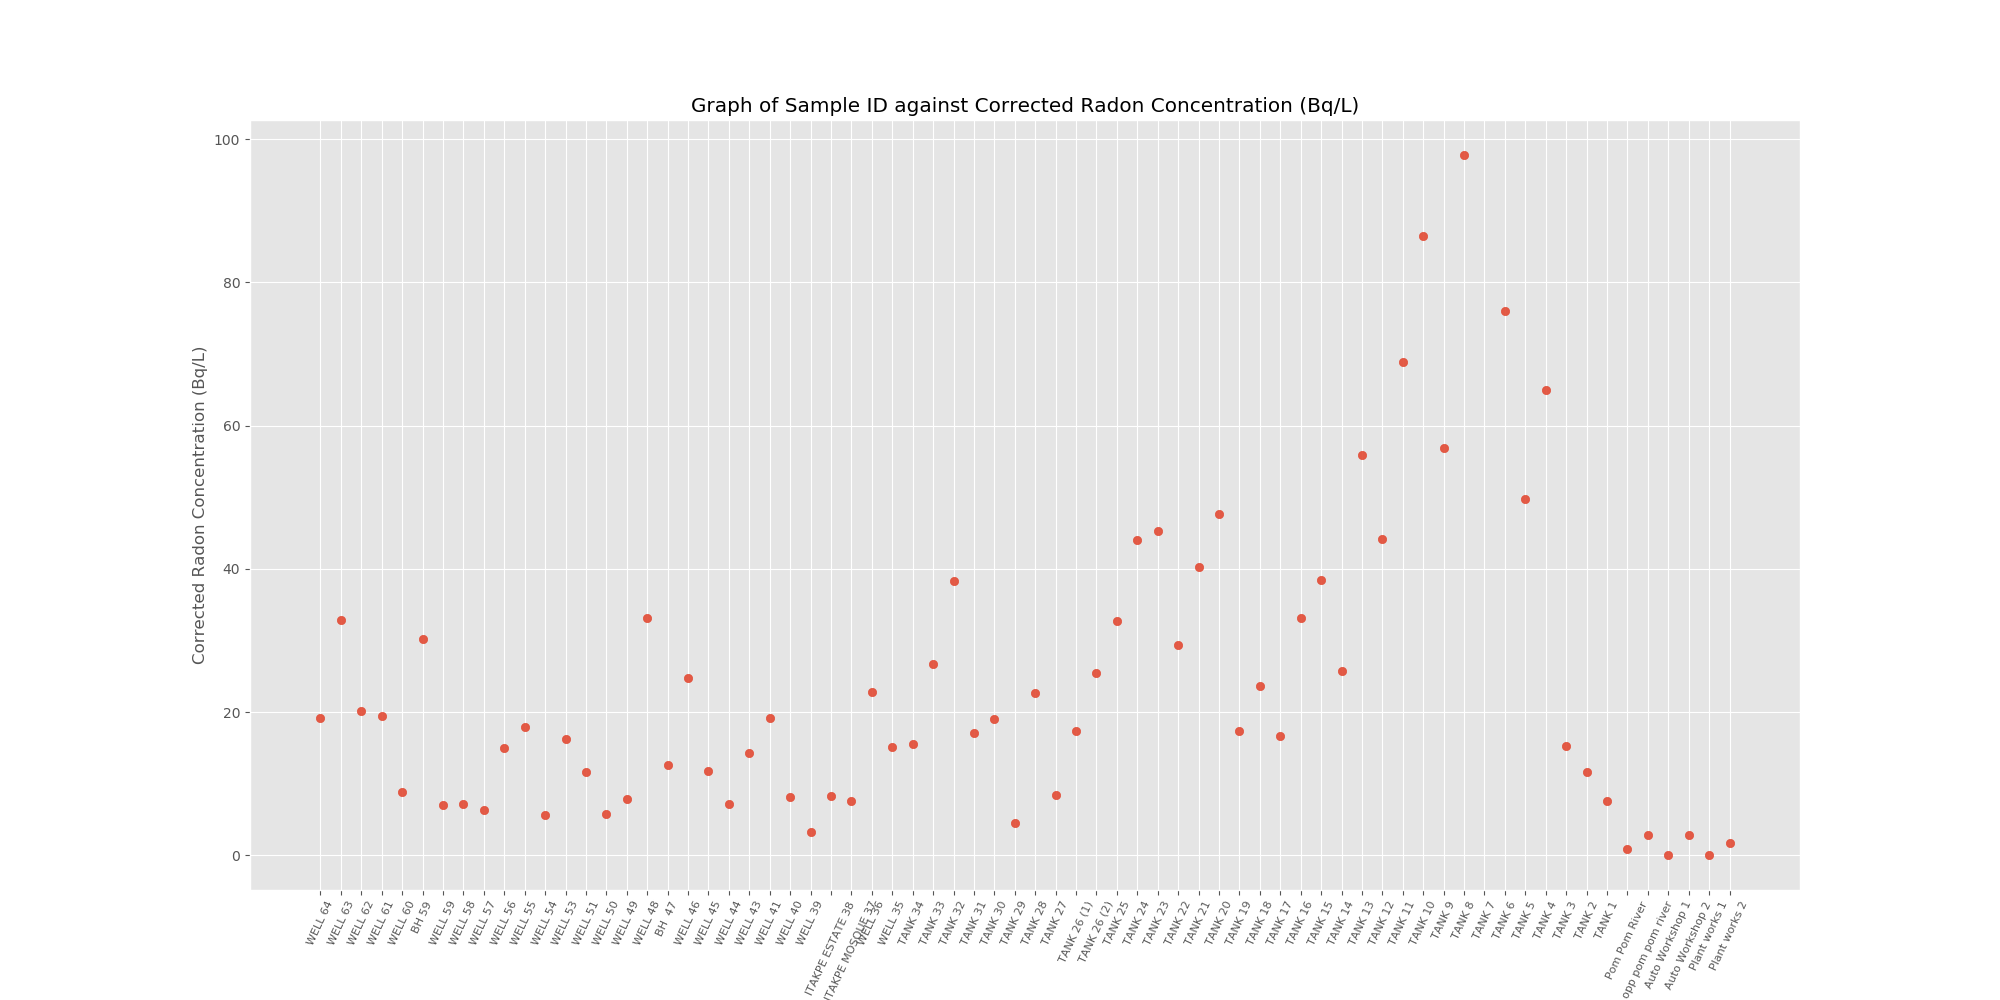

In [7]:
from matplotlib import style
y=df_raw['Corrected Radon Conc Bq/L ']
x=df_raw['Sample ID']
plt.figure(figsize=(20,10))
plt.title('Graph of Sample ID against Corrected Radon Concentration (Bq/L)')
plt.scatter(x, y, alpha=0.9)
plt.ylabel("Corrected Radon Concentration (Bq/L)")
plt.xlabel("Sample ID")
plt.xticks(x,rotation='65', fontsize=8)
plt.show()

<IPython.core.display.Javascript object>


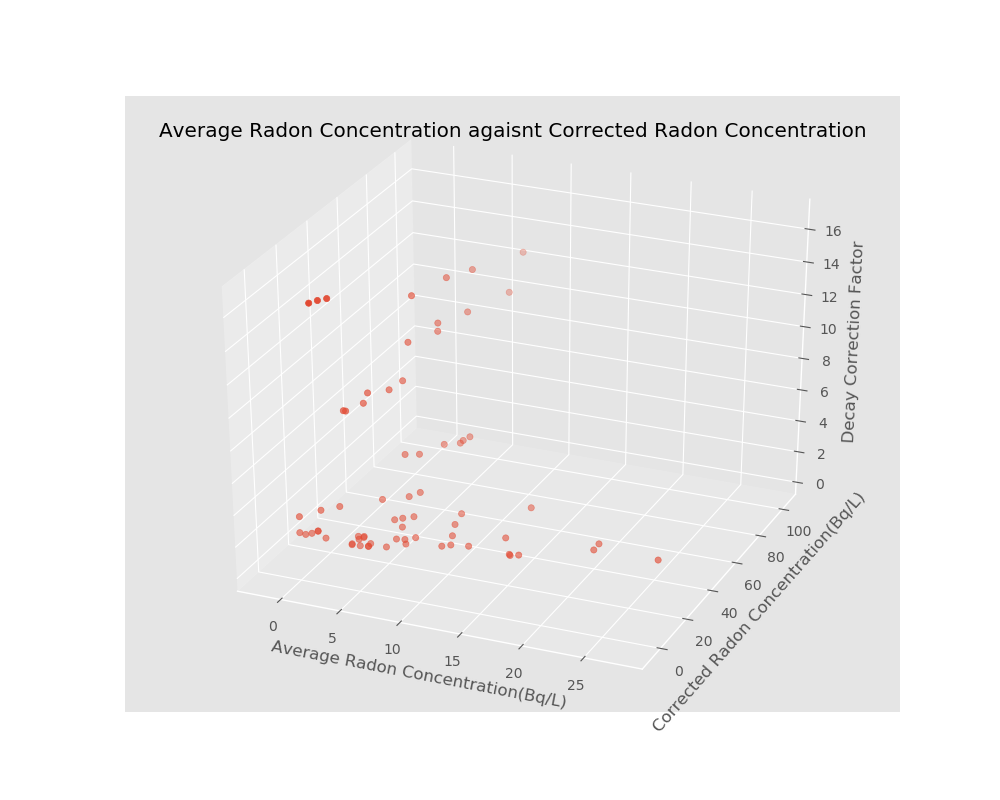

In [8]:
from matplotlib import style
x= df_raw['Average Radon Conc (Bq/L)']
y= df_raw['Corrected Radon Conc Bq/L ']
z=df_raw['Decay Correction Factor']
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
plt.title("Average Radon Concentration agaisnt Corrected Radon Concentration")
ax.scatter3D(x,y,z)
ax.set_xlabel('Average Radon Concentration(Bq/L)')
ax.set_ylabel('Corrected Radon Concentration(Bq/L)')
ax.set_zlabel('Decay Correction Factor')
plt.show()

In [9]:
df_raw = df_raw.fillna(df_raw.mean())

In [10]:
del df_raw['Sample date']

In [11]:
del df_raw['sample time']

In [12]:
df_raw[['1st Cycle (Bq/L)','2nd Cycle (Bq/L)','3rd Cycle (Bq/L)','4th Cycle (Bq/L)']]= df_raw[['1st Cycle (Bq/L)','2nd Cycle (Bq/L)','3rd Cycle (Bq/L)','4th Cycle (Bq/L)']].astype(float, errors='ignore')

In [13]:
df_raw.dropna(inplace=True)

<IPython.core.display.Javascript object>


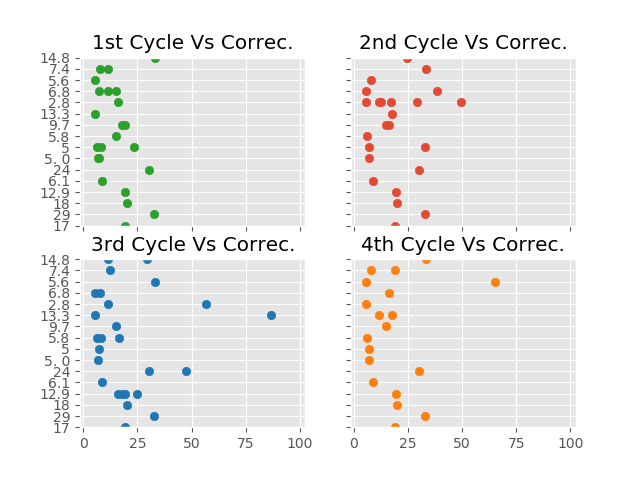

In [14]:

x=df_raw['1st Cycle (Bq/L)']
y=df_raw['2nd Cycle (Bq/L)']
m=df_raw['3rd Cycle (Bq/L)']
l=df_raw['4th Cycle (Bq/L)']
k=df_raw['Corrected Radon Conc Bq/L ']

fig, axs = plt.subplots(2,2, sharey=True)
axs[0,0].scatter(k, x, color='tab:green')
axs[0,0].set_title('1st Cycle Vs Correc.')
axs[0,1].scatter(k,y)
axs[0,1].set_title('2nd Cycle Vs Correc.')
axs[1,0].scatter(k,m, color='tab:blue')
axs[1,0].set_title('3rd Cycle Vs Correc.')
axs[1,1].scatter(k,l, color='tab:orange')
axs[1,1].set_title('4th Cycle Vs Correc.')

for ax in axs.flat:
    ax.set(xlabel='', ylabel='')
for ax in axs.flat:
    ax.label_outer()
for ax in axs.flat:
    ax.set_ylim(0, 15)
plt.show()

## For simplicity, certain column names were renamed as the brackets may pose problems while working with the folium library

In [15]:
df_raw.rename(columns={'1st Cycle (Bq/L)':'1st Cyle Bq/L','2nd Cycle (Bq/L)':'2nd Cycle Bq/L',
                      '3rd Cycle (Bq/L)': '3rd Cycle Bq/L', '4th Cycle (Bq/L)':'4th Cycle Bq/L'}, inplace=True)

display_all is a simple function that shows all values present in the dataframe. It extremely useful as dataframes can be 
inspected much faster and with ease too.  

In [16]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [17]:
df_raw.info(display_all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 63
Data columns (total 17 columns):
s/n                           63 non-null int64
Sample ID                     63 non-null object
Run Number                    63 non-null object
Analysis date                 63 non-null object
Analysis time                 63 non-null object
diff in hours                 63 non-null float64
1st Cyle Bq/L                 63 non-null object
2nd Cycle Bq/L                63 non-null object
3rd Cycle Bq/L                63 non-null object
4th Cycle Bq/L                63 non-null object
Average Radon Conc (Bq/L)     63 non-null float64
Std. Dev (Bq/L)               63 non-null float64
Decay Correction Factor       63 non-null float64
Corrected Radon Conc Bq/L     63 non-null float64
Std. Dev (Bq/L).1             63 non-null float64
latitude                      63 non-null float64
longitude                     63 non-null float64
dtypes: float64(8), int64(1), object(8)
memory usage: 8.9

For a quick clean up of data, the mean of each column was taken and used to fill any missing data. 

In [18]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1st Cyle Bq/L                 0.0
2nd Cycle Bq/L                0.0
3rd Cycle Bq/L                0.0
4th Cycle Bq/L                0.0
Analysis date                 0.0
Analysis time                 0.0
Average Radon Conc (Bq/L)     0.0
Corrected Radon Conc Bq/L     0.0
Decay Correction Factor       0.0
Run Number                    0.0
Sample ID                     0.0
Std. Dev (Bq/L)               0.0
Std. Dev (Bq/L).1             0.0
diff in hours                 0.0
latitude                      0.0
longitude                     0.0
s/n                           0.0
dtype: float64

In [19]:
df_raw['Corrected Radon Conc Bq/L '] = df_raw['Corrected Radon Conc Bq/L '].astype(str)

# Folium Map


The folium map is created and the mean of both the latitude and longitude is take.This is done 
so as to have the map begin at a reasonably central location. That said, the view will not stray 
so far from the marker locations 

In [20]:
m = folium.Map(location = [df_raw['latitude'].mean(),
                           df_raw['longitude'].mean()], 
               zoom_start=16, tiles='OpenStreetMap')

In [21]:
fg = folium.FeatureGroup(name='Radiation Locations')          

A for loop is created so as to loop through each location and display the calculated Radon concentration using 
popup from folium. zip was used for iteration as it is much faster than the basic iteration method.

In [22]:
for lat, long, correctedconc, sampleID in zip(df_raw['latitude'],
    df_raw['longitude'],df_raw['Corrected Radon Conc Bq/L '],df_raw['Sample ID']):
    fg.add_child(folium.Marker(location=[lat,long],popup=(folium.Popup(correctedconc + " Bq/L")), icon=folium.Icon(color='blue', icon='download', prefix='fa'), tooltip = sampleID))
   
                 

In [23]:
m.add_child(fg)

Finally, the file is saved as a html file which can be viewed at a later date

In [24]:
m.save(outfile='Itakpe Radon Locations.html')